# **New York City Taxi Fare Prediction Project**

Welcome to the showcase of my New York City Taxi Fare Prediction project. In this project, I have leveraged machine learning techniques to predict taxi fares in the bustling streets of New York City. I will take you through the entire journey, from data acquisition to model evaluation, in an elegant and organized manner.

## Data Acquisition

To begin, I needed to acquire the dataset. I utilized the Kaggle API to download the dataset directly to my project environment. Below are the commands I used to achieve this:

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle competitions download -c new-york-city-taxi-fare-prediction

100% 1.55G/1.56G [00:21<00:00, 86.3MB/s]
100% 1.56G/1.56G [00:21<00:00, 78.8MB/s]


In [ ]:
!unzip /content/new-york-city-taxi-fare-prediction.zip

Archive:  /content/new-york-city-taxi-fare-prediction.zip
  inflating: GCP-Coupons-Instructions.rtf  
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
! rm /content/new-york-city-taxi-fare-prediction.zip

In [ ]:
! rm /content/GCP-Coupons-Instructions.rtf
! rm /content/sample_submission.csv

This code installs the Kaggle library, configures the Kaggle API credentials, and downloads the dataset in a zip file.

## Data Exploration

Once the dataset was obtained, I conducted an initial exploration to understand its structure. I imported essential libraries such as NumPy, Pandas, Matplotlib, and Seaborn to assist with this task.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from math import sqrt

I loaded the data into a Pandas DataFrame and inspected its contents:

In [ ]:
fare = pd.read_csv("/content/train.csv", nrows = 2_000_000, parse_dates = ["pickup_datetime"], infer_datetime_format=True)
fare.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


In [ ]:
fare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 8 columns):
 #   Column             Dtype              
---  ------             -----              
 0   key                object             
 1   fare_amount        float64            
 2   pickup_datetime    datetime64[ns, UTC]
 3   pickup_longitude   float64            
 4   pickup_latitude    float64            
 5   dropoff_longitude  float64            
 6   dropoff_latitude   float64            
 7   passenger_count    int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(1)
memory usage: 122.1+ MB


In [ ]:
fare.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+06,2.000000e+06,2.000000e+06,1.999986e+06,1.999986e+06,2.000000e+06
mean,1.134779e+01,-7.252321e+01,3.992963e+01,-7.252395e+01,3.992808e+01,1.684113e+00
std,9.852883e+00,1.286804e+01,7.983352e+00,1.277497e+01,1.032382e+01,1.314982e+00
min,-6.200000e+01,-3.377681e+03,-3.458665e+03,-3.383297e+03,-3.461541e+03,0.000000e+00
25%,6.000000e+00,-7.399208e+01,4.073491e+01,-7.399141e+01,4.073400e+01,1.000000e+00
50%,8.500000e+00,-7.398181e+01,4.075263e+01,-7.398016e+01,4.075312e+01,1.000000e+00
75%,1.250000e+01,-7.396713e+01,4.076710e+01,-7.396369e+01,4.076809e+01,2.000000e+00
max,1.273310e+03,2.856442e+03,2.621628e+03,3.414307e+03,3.345917e+03,2.080000e+02


The dataset contains various columns such as pickup and drop-off coordinates, timestamps, and fare amounts. This exploration allowed me to gain insights into the data's structure and any missing values.

## Data Preprocessing and Visualization



In [ ]:
fare.isnull().sum()

key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    14
dropoff_latitude     14
passenger_count       0
dtype: int64

In [ ]:
(fare.fare_amount<0).sum()

77

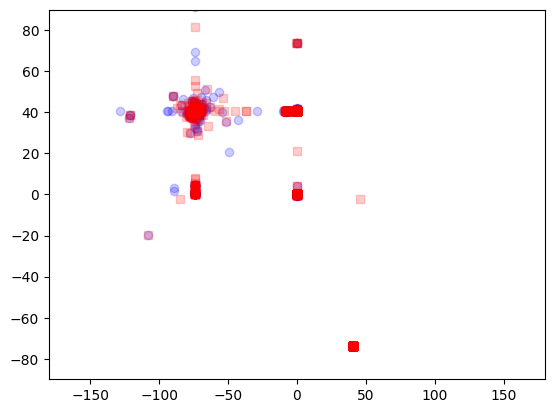

In [ ]:
plt.plot(fare.pickup_longitude, fare.pickup_latitude, 'bo', alpha=0.2)
plt.plot(fare.dropoff_longitude, fare.dropoff_latitude, 'rs', alpha=0.2)
plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.show()

In [ ]:
(fare.pickup_longitude>0).sum() + (fare.dropoff_longitude>0).sum() + (fare.pickup_latitude<0).sum() + (fare.dropoff_latitude<0).sum()

4161

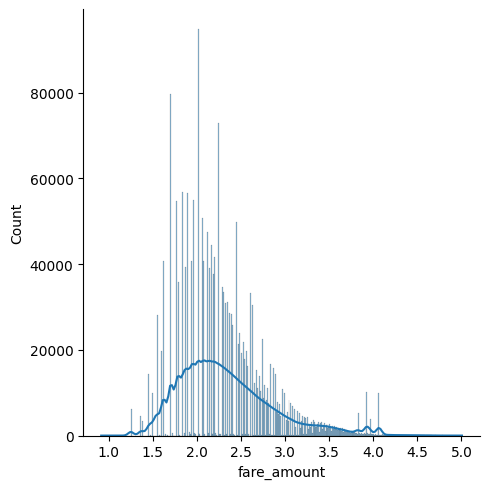

In [ ]:
sns.displot(np.log1p(fare.fare_amount), kde=True)

In [ ]:
(np.log1p(fare.fare_amount) < 1).sum()

2

In [ ]:
(np.log1p(fare.fare_amount) > 5).sum()

4

<ipython-input-30-9c97f441e0c1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log1p(fare.fare_amount))


<Axes: xlabel='fare_amount', ylabel='Density'>

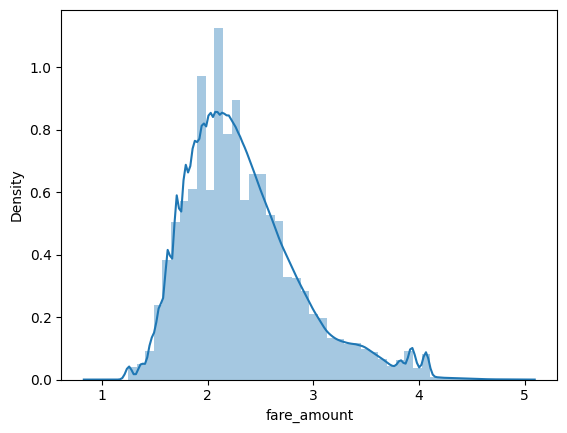

In [ ]:
sns.distplot(np.log1p(fare.fare_amount))

In [ ]:
def distance_calculate_(lat1, lon1, lat2, lon2):

    p = np.pi/180
    a = 0.5 - np.cos((lat2-lat1)*p)/2 + np.cos(lat1*p) * np.cos(lat2*p) * (1-np.cos((lon2-lon1)*p))/2

    return 12742 * np.arcsin(np.sqrt(a))

In [ ]:
def add_distance_(fare):

    fare["Distance"] = distance_calculate_(fare.pickup_latitude, fare.pickup_longitude, fare.dropoff_latitude, fare.dropoff_longitude)

    return fare

### Feature Engineering
I also performed feature engineering to create meaningful features for the model. This included calculating the distance between pickup and drop-off locations and extracting datetime features like hour, date, month, year, and day of the week.

In [ ]:
def add_datetime_(fare):

    fare["Hour"] = fare.pickup_datetime.dt.hour
    fare["Date"] = fare.pickup_datetime.dt.date
    fare["Month"] = fare.pickup_datetime.dt.month
    fare["Year"] = fare.pickup_datetime.dt.year
    fare["Day"] = fare.pickup_datetime.dt.dayofweek
    fare = fare.drop("pickup_datetime", axis=1)

    return fare

In [ ]:
fare = add_datetime_(fare)
fare = add_distance_(fare)


<ul>
<li>Fare Amount cannot be negative, instances can be dropped</li>
<li>New York city's co-ordinates are 40.7128° N, 74.0060° W, <i>think more</i></li>
<li>Data Instances with null values can be removed</li>
<li>Positive skewness in fare, take log</li>
<li> Feature Engineering:<ul>
    <li>Distance</li>
    <li>Datetime features</li></ul>
</li>
<li>Feature trends with fare</li>
</ul>

## Data Visualization

Visualizing the data is crucial for understanding its distribution and relationships between features. I created various plots to visualize the data and identify patterns and trends. Here's an example of plotting pickup and drop-off locations:

In [ ]:
plt.plot(fare.pickup_longitude, fare.pickup_latitude, 'bo', alpha=0.2)
plt.plot(fare.dropoff_longitude, fare.dropoff_latitude, 'rs', alpha=0.2)
plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1826: UserWarning: 
The palette list has fewer values (6) than needed (9) and will cycle, which may produce an uninterpretable plot.
  func(x=self.x, y=self.y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1877: UserWarning: 
The palette list has fewer values (6) than needed (9) and will cycle, which may produce an uninterpretable plot.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1883: UserWarning: 
The palette list has fewer values (6) than needed (9) and will cycle, which may produce an uninterpretable plot.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)


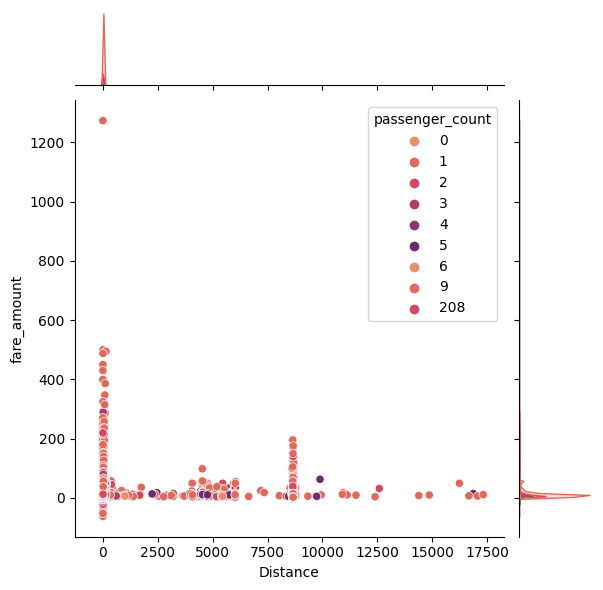

In [ ]:
sns.jointplot(fare, x="Distance", y="fare_amount", kind="scatter", hue="passenger_count", palette=sns.color_palette("flare"))

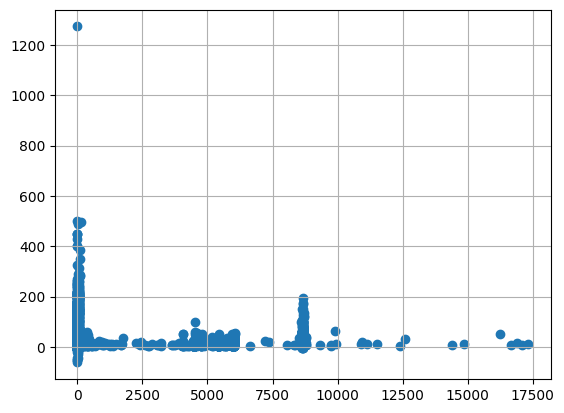

In [ ]:
plt.scatter(fare.Distance, fare.fare_amount)
plt.grid()
plt.show()

In [ ]:
(fare["Distance"] >= 10000).sum()

13

In [ ]:
fare["Distance"].sort_values(ascending=True)

877730     0.0
1638687    0.0
1216209    0.0
1401147    0.0
274343     0.0
          ... 
895400     NaN
1220978    NaN
1476796    NaN
1521628    NaN
1882440    NaN
Name: Distance, Length: 2000000, dtype: float64

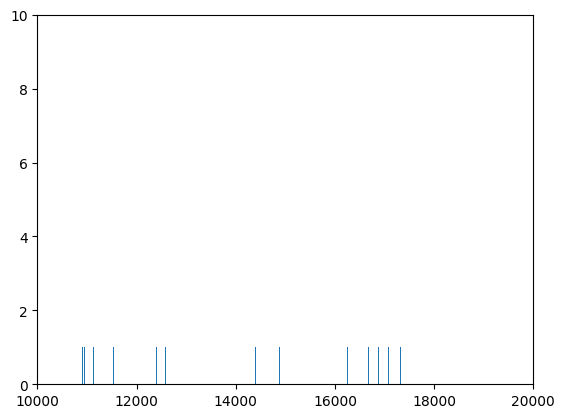

In [ ]:
plt.hist(fare.Distance, bins=1000)
plt.xlim([10000, 20000])
plt.ylim([0,10])
plt.show()

In [ ]:
fare.passenger_count.value_counts()

1      1383192
2       295881
5       141493
3        87652
4        42654
6        42003
0         7123
208          1
9            1
Name: passenger_count, dtype: int64

<Axes: xlabel='count', ylabel='passenger_count'>

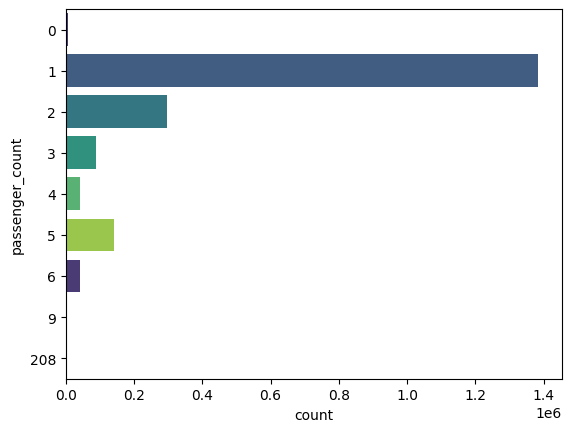

In [ ]:
sns.countplot(fare, y="passenger_count", palette=sns.color_palette("viridis"))

<Axes: xlabel='count', ylabel='Year'>

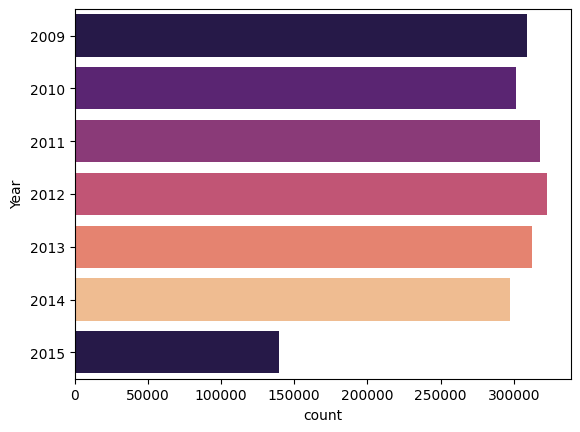

In [ ]:
sns.countplot(fare, y="Year", palette=sns.color_palette("magma"))

<Axes: xlabel='count', ylabel='Month'>

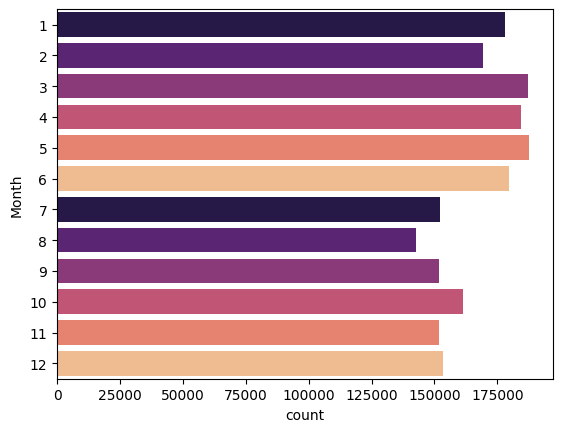

In [ ]:
sns.countplot(fare, y="Month", palette=sns.color_palette("magma"))

<Axes: xlabel='count', ylabel='Day'>

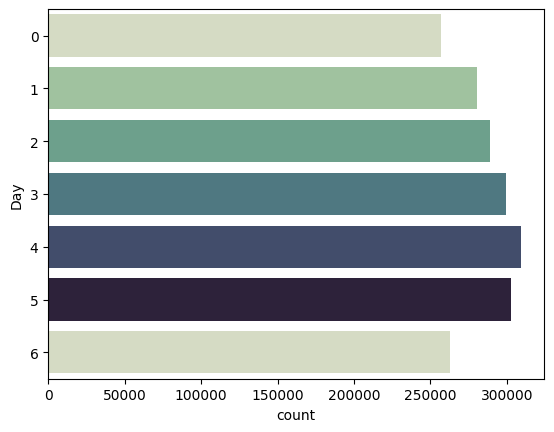

In [ ]:
sns.countplot(fare, y="Day", palette=sns.cubehelix_palette(start=.5, rot=-.75))

<Axes: xlabel='count', ylabel='Hour'>

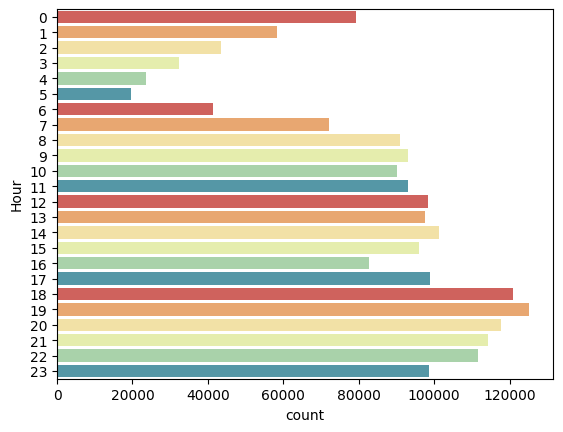

In [ ]:
sns.countplot(fare, y="Hour", palette=sns.color_palette("Spectral"))

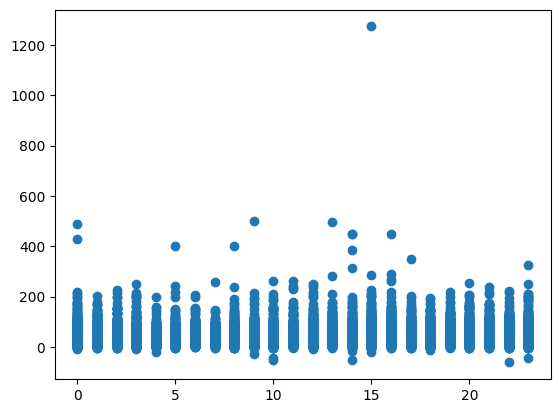

In [ ]:
plt.scatter(fare["Hour"], fare["fare_amount"])
plt.show()

In [ ]:
plt.scatter(fare["Year"], fare["fare_amount"])
plt.show()

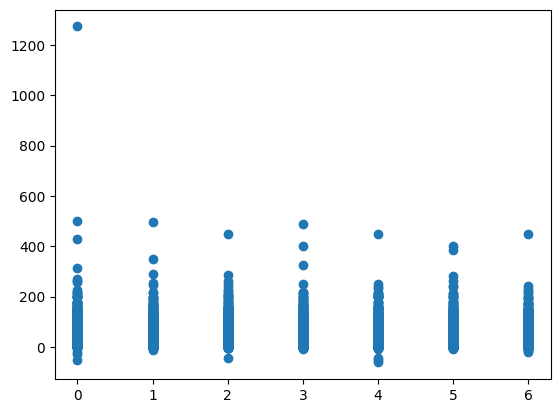

In [ ]:
plt.scatter(fare["Day"], fare["fare_amount"])
plt.show()

In [ ]:
plt.scatter(fare["Day"], fare["Distance"])
plt.show()

In [ ]:
plt.hist(fare["fare_amount"],bins=1000)
plt.ylim([0,10])
plt.xlim([100,250])
plt.show()

Data cleaning based on:
<ul>
    <li>Null values</li>
    <li>Negative fare</li>
    <li>Fare amount outliers</li>
    <li>Longitude latitude box</li>
    <li>Distance 0 and fare 0</li>
    <li>Passengers clean</li>
    <li>Distance outliers</li>
    <li>Normalize fare amount <i>np.log</i></li>
</ul>

### Cleaning
I addressed several data quality issues in the dataset. This included handling null values, negative fare amounts, outliers in longitude and latitude, and instances with zero distance and zero fares. The cleaning process ensured the data's integrity and improved the model's performance.

In [ ]:
def clean_dataset_(df):

    df = df[df.fare_amount >= 0]
    df = df[np.logical_and(np.log1p(df.fare_amount)>1, np.log1p(df.fare_amount)<5)]
    df = df[np.any([df.pickup_longitude>-180, df.dropoff_longitude>-180, df.pickup_longitude<180, df.dropoff_longitude<180, df.pickup_latitude>-90, df.dropoff_latitude>-90, df.pickup_latitude<90, df.dropoff_latitude<90], axis=0)]
    df = df[np.all([df.fare_amount != 0, df.Distance != 0], axis=0)]
    df = df[np.any([df.passenger_count > 1, df.passenger_count < 8], axis=0)]
    df = df[df.Distance < 10000]
    df = df.dropna(axis=0)

    return df

In [ ]:
fare = clean_dataset_(fare)

In [ ]:
fare.shape

(1942835, 13)

<ipython-input-18-ceeac0edd97d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = fare.corr()


<Axes: >

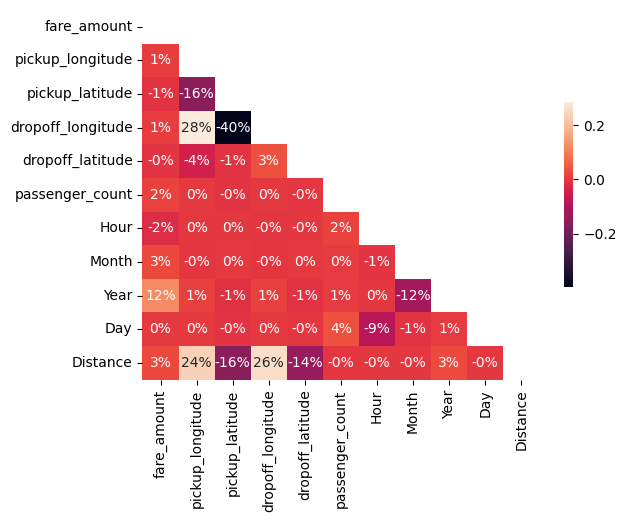

In [ ]:
corr = fare.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.color_palette("rocket", as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, annot=True,
            fmt=".0%", cbar=True, cbar_kws={'shrink':0.5})

In [ ]:
X, y = fare.drop(["fare_amount", "key", "Date"], axis=1), fare.fare_amount

In [ ]:
y_ = np.log1p(y)

## Model Building

For predicting taxi fares, I experimented with three different regression models: Random Forest Regressor, XGBoost Regressor, and LightGBM Regressor. I also employed a stacking technique to combine the predictions of these models for improved accuracy.

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import lightgbm as lgb

In [ ]:
X_train, X_val, y_train_, y_val_ = train_test_split(X, y_, test_size=0.2, random_state=42)

### Random Forest Regressor
I used the Random Forest Regressor from scikit-learn and trained it on the preprocessed data. Here's a snippet of the code:

In [ ]:
rnd_reg = RandomForestRegressor ()
rnd_reg.fit(X_train, y_train_)

RandomForestRegressor()

In [ ]:
rnd_path = "/content/drive/MyDrive/Colab Notebooks/rnd_reg.pkl"
joblib.dump(rnd_reg, rnd_path)
# knn_from_joblib = joblib.load('filename.pkl')

['/content/drive/MyDrive/Colab Notebooks/rnd_reg.pkl']

In [ ]:
y_rnd_predict_ = rnd_reg.predict(X_val)
rnd_error = sqrt(mean_squared_error(np.expm1(y_val_), np.expm1(y_rnd_predict_)))
print(f"Random Forest Regressor\n{rnd_error}")

Random Forest Regressor
3.479711090871546


### XGBoost Regressor
For XGBoost, I performed hyperparameter tuning using RandomizedSearchCV to find the best parameters:

In [ ]:
param_grid ={
    'n_estimators' : [400, 500, 600, 700],
    'learning_rate': [0.1, 0.3],
    'max_depth' : [4, 5, 6],
}

xgb_param_cv = RandomizedSearchCV (estimator = XGBRegressor(), param_distributions=param_grid,
                                   n_jobs=-1, random_state=42)

xgb_param_cv.fit(X_train, y_train_)

In [ ]:
xgb_param_cv.best_params_

In [ ]:
xgb_reg = XGBRegressor (learning_rate=0.3,
                        max_depth = 6,
                        n_estimators = 500)

xgb_reg.fit(X_train, y_train_)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
y_xgb_predict_ = xgb_reg.predict(X_val)
xgb_error = sqrt(mean_squared_error(np.expm1(y_val_), np.expm1(y_xgb_predict_)))
print(f"XGBoost Regressor\n{xgb_error}")

XGBoost Regressor
3.4339668013655085


In [ ]:
xgb_reg.feature_importances_

### LightGBM Regressor
I utilized the LightGBM Regressor and trained it on the dataset:

In [ ]:
lgb_reg = lgb.LGBMRegressor(objective = 'regression',
                            n_estimators = 300)

lgb_reg.fit(X_train, y_train_)

In [ ]:
y_lgb_predict_ = lgb_reg.predict(X_val)
lgb_error = sqrt(mean_squared_error(np.exp1m(y_val_), np.exp1m(y_lgb_predict_)))
print(f"LightGBM Regressor\n{lgb_error}")

## Stacking
To create the stacked model, I combined the predictions of the Random Forest, XGBoost, and LightGBM models and calculated the average:

In [ ]:
stacked_prediction = stacked_prediction = (np.expm1(y_rnd_predict_) + np.expm1(y_xgb_predict_) + np.exp1m(y_lgb_predict_)) / 3


print(f"Random Forest Regressor Error: {rnd_error}")
print(f"XGBoost Regressor Error: {xgb_error}")
print(f"LightGBM Regressor Error: {lgb_error}")
print(f"Stacked Model Error: {sqrt(mean_squared_error(np.expm1(y_val_), stacked_prediction))}")